# Analysis of Video Game sales 

## Introduction: Unraveling Dynamics in Video Game Sales

* The video game industry stands as a vibrant and dynamic landscape, continually shaped by evolving consumer preferences, technological advancements, and global market trends. In this comprehensive analysis, I embark on a journey through a rich dataset encompassing a myriad of factors that influence the sales trajectory of video games.

* Dataset Overview:
Our exploration hinges on a meticulously curated dataset featuring crucial variables such as genre, platform, publisher, and regional sales. This dataset serves as a treasure trove of insights, allowing us to unravel trends, identify market patterns, and derive meaningful conclusions about the ever-evolving world of video game sales.

* Objectives:
The primary objectives of this analysis are threefold:

  - Descriptive Analysis: Uncover key statistical measures and visualize the distribution of video game sales across genres, platforms, and regions.
Genre and Platform Trends: Explore the temporal trends of genres and platforms to understand the changing landscape of player preferences.
Regional Preferences and Correlations: Investigate regional nuances in video game preferences and assess potential correlations between sales in different regions.
  - Significance of the Analysis:
Understanding the dynamics of video game sales is not merely an academic exercise; it holds paramount importance for industry stakeholders, including developers, publishers, and marketers. As the gaming industry becomes increasingly competitive, informed decision-making based on data-driven insights is crucial for staying ahead of the curve.

  - Scope and Structure:
This analysis is structured to navigate through various facets of the dataset. We will commence with data cleaning and preprocessing to ensure the integrity of our findings. Subsequently, we will delve into descriptive analyses, exploring summary statistics and visualizing data distributions. Genre and platform trends, regional preferences, and correlations will then be thoroughly examined.

As we embark on this analytical journey, the ultimate goal is to distill actionable insights that can guide strategic decision-making within the dynamic and rapidly evolving realm of video game sales.

I will start by importing the necessary libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as kmeans
import statsmodels.api as sm


After importing the neccessary libraries,  I will go ahead and import my dataset into my notebook for cleaning and EDA

In [4]:
vg_sales = pd.read_csv('vgsales.csv')

Let's get a glimpse of how the dataset looks.

In [9]:
vg_sales.head()
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


I will go ahead and check for missing values

In [8]:
missing_values = vg_sales.isnull().sum()
print(missing_values)

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


From the above result, it is obvious we have 271 rows with missing values in the year column and 58 row of missing values in the publisher column.
Since, I have limited information about the background of the dataset, i can not flash fill, so i will just drop the rows with missing values.

In [16]:
vg_sales = vg_sales.dropna(subset=['Year', 'Publisher'])

Let me check for duplicates

In [10]:
duplicates = vg_sales[vg_sales.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []


I will quickly check the shape of my dataset(that is, the number of rows and columns therein)

In [17]:
print('We have', vg_sales.shape[0], 'rows in the entire dataset')
print('We have', vg_sales['Name'].nunique(),
      'unique video games in the entire dataset')
print('Also, we have', vg_sales.shape[1], 'columns in the dataset')

We have 16291 rows in the entire dataset
We have 11325 unique video games in the entire dataset
Also, we have 11 columns in the dataset


### NOW, THE EXPLORATIVE DATA ANALYSIS



## Sale Analysis

### Top 10 best selling video games globally

In [ ]:
vg_sales[['Name', 'Platform', 'Year', 'Publisher',
      'Global_Sales']].head(10).sort_values(by='Global_Sales', ascending=False)


,Name,Platform,Year,Publisher,Global_Sales
0,Wii Sports,Wii,2006,Nintendo,82.74
1,Super Mario Bros.,NES,1985,Nintendo,40.24
2,Mario Kart Wii,Wii,2008,Nintendo,35.82
3,Wii Sports Resort,Wii,2009,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Nintendo,31.37
5,Tetris,GB,1989,Nintendo,30.26
6,New Super Mario Bros.,DS,2006,Nintendo,30.01
7,Wii Play,Wii,2006,Nintendo,29.02
8,New Super Mario Bros. Wii,Wii,2009,Nintendo,28.62
9,Duck Hunt,NES,1984,Nintendo,28.31


### Top 10 Best-Selling Video Game Titles by Country

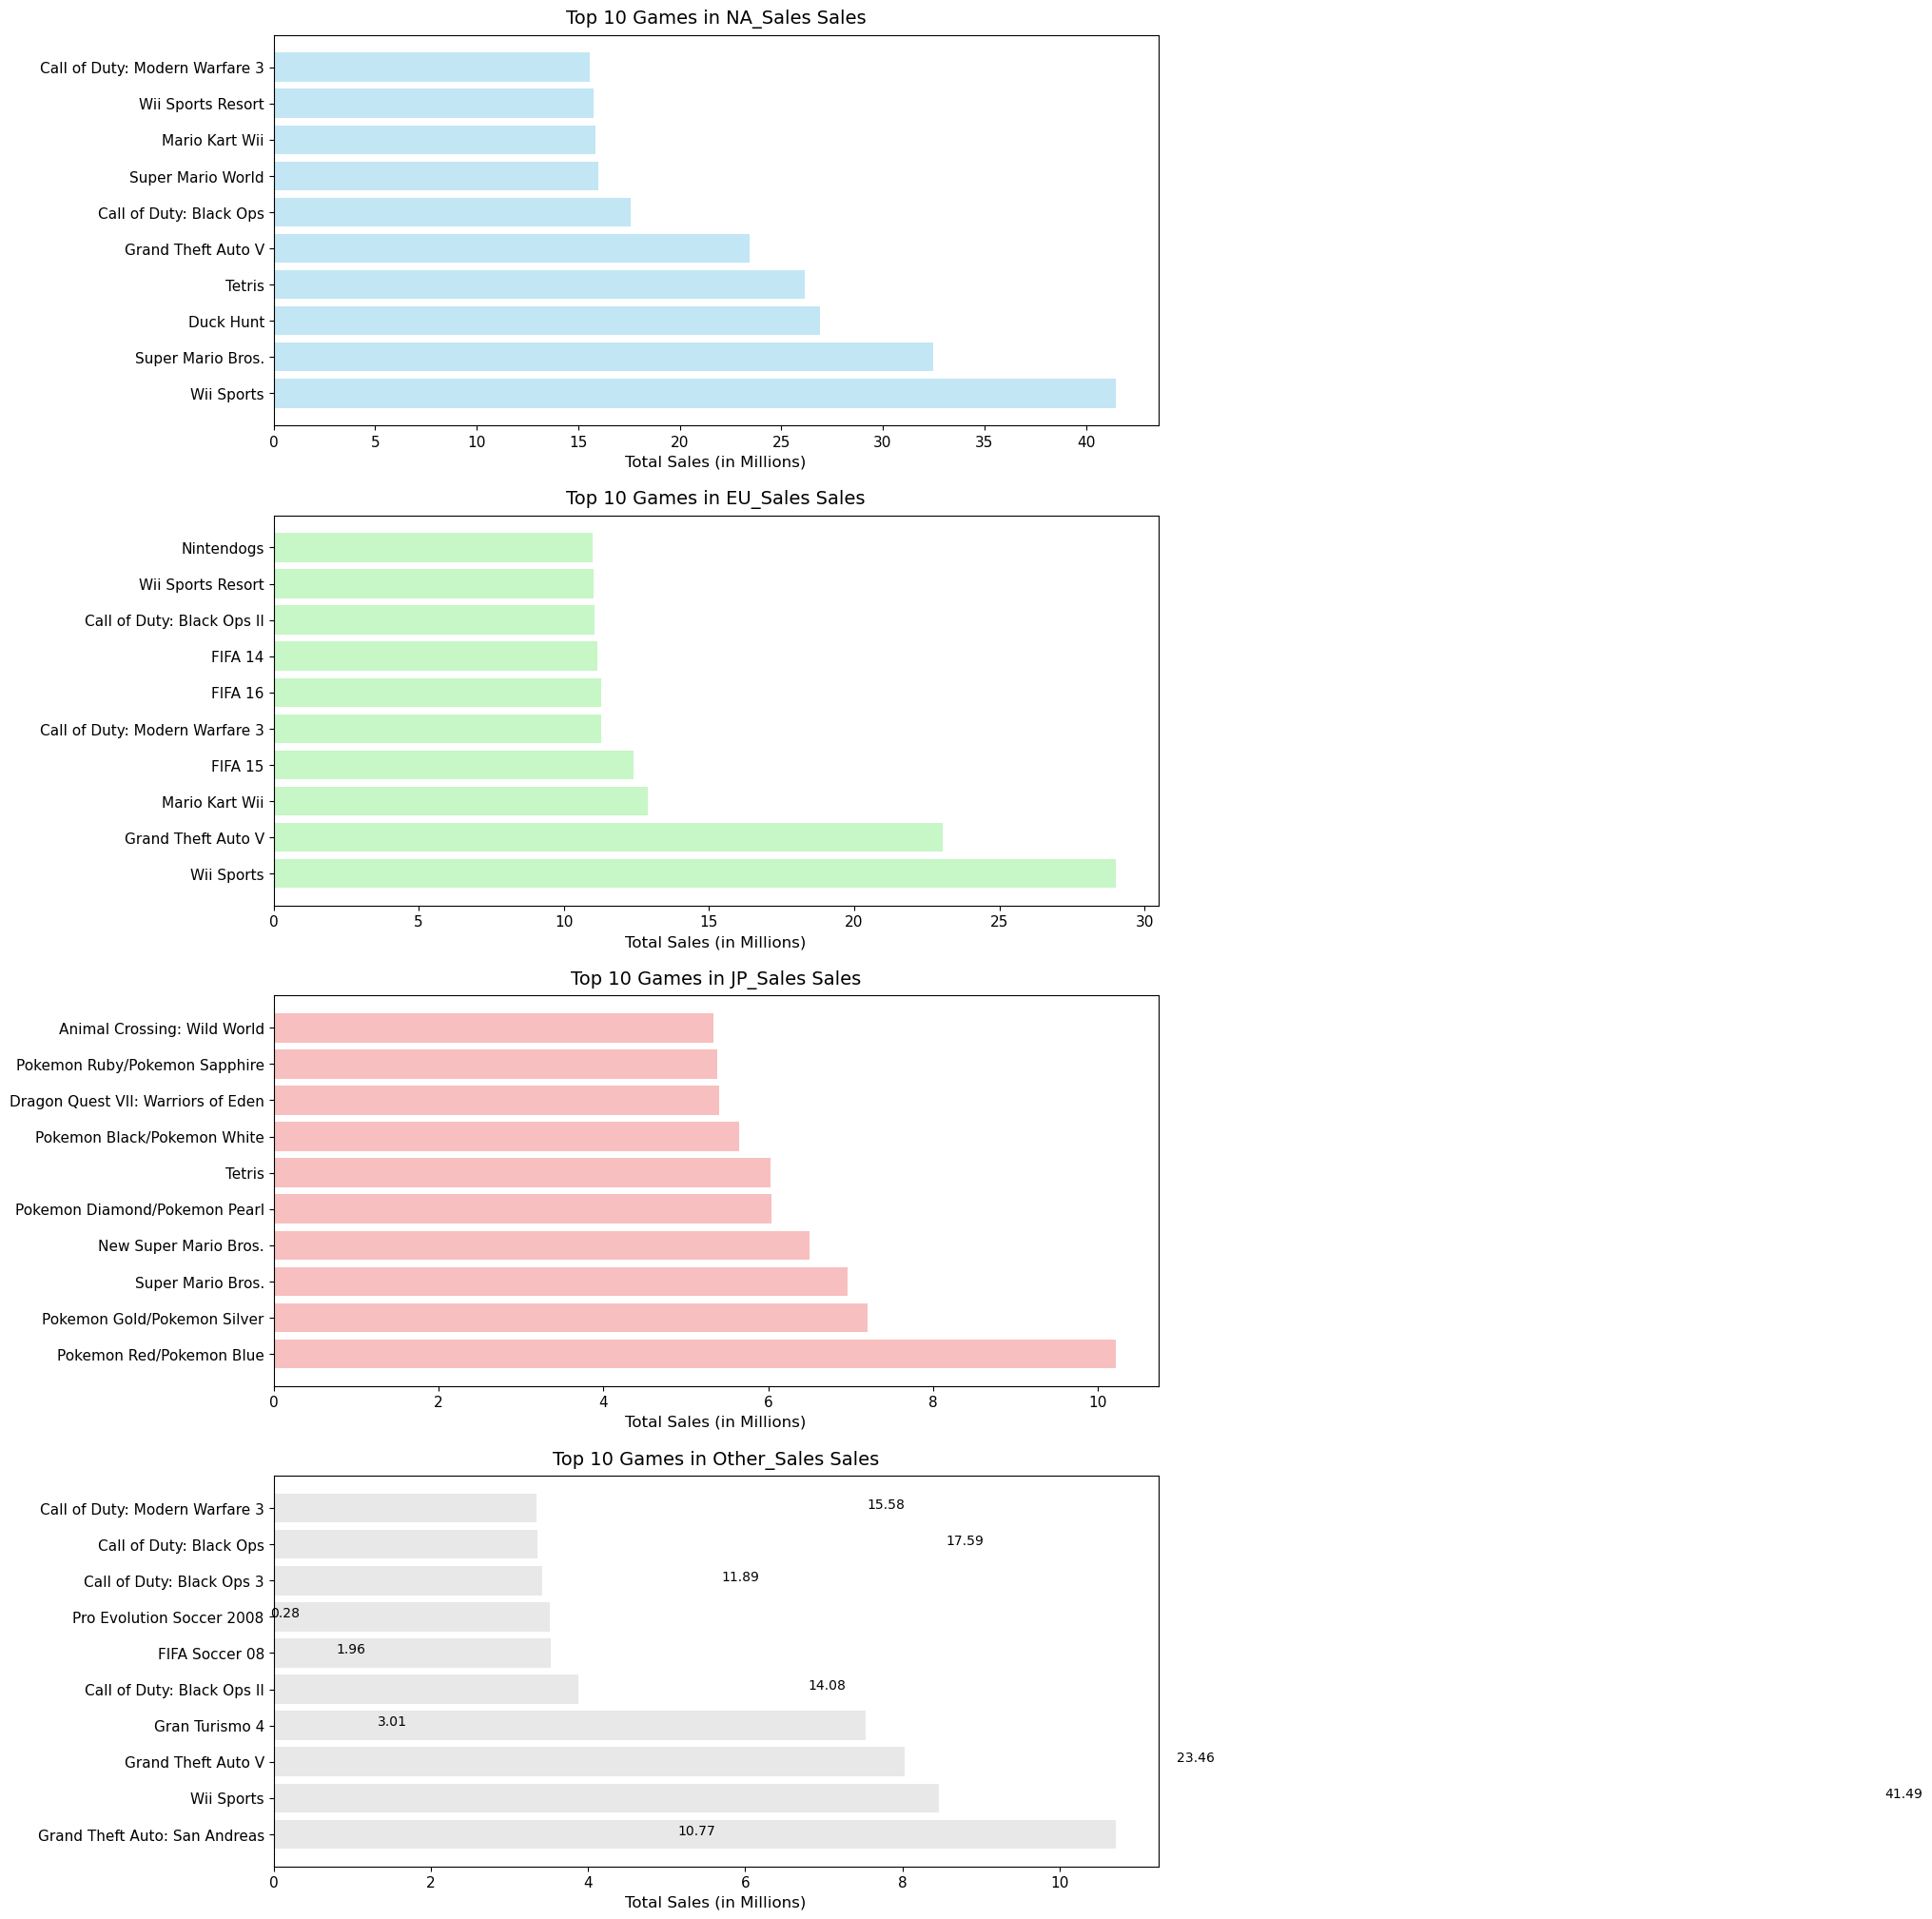

In [28]:
# Select relevant columns for sales in different regions
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_sales = vg_sales[['Name'] + sales_columns].copy()

# Group by 'Name' and sum the sales for each region
region_sales = region_sales.groupby('Name')[sales_columns].sum()

# Set up the colors for each region
colors_region = ['skyblue', 'lightgreen', 'lightcoral', 'lightgrey']

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 25))

# Iterate over each region
for i, region in enumerate(sales_columns):
    # Get the top 10 games for each region
    top_games = region_sales.sort_values(by=region, ascending=False).head(10)

    # Plotting the bar chart
    axes[i].barh(top_games.index,
                 top_games[region],
                 color=colors_region[i],
                 alpha=0.5)

    # Setting title and labels
    axes[i].set_title(f'Top 10 Games in {region} Sales', fontsize=14, y=1.01)
    axes[i].set_xlabel('Total Sales (in Millions)', fontsize=12)
    axes[i].tick_params(axis='x', labelsize=11)
    axes[i].tick_params(axis='y', labelsize=11)

# Adding sales values as text on the bars
for j, game in enumerate(top_games.index):
    sales_value = top_games.loc[game].values[
        0]  # Extracting the first (and only) element
    axes[i].text(sales_value / 2 if sales_value > 0 else 0,
                 j,
                 round(sales_value, 2),
                 ha='center')




# Adjusting subplot spacing
fig.subplots_adjust(hspace=0.23)

plt.show()


### Let's run down our analysis of regional sales by Genre and platform

In [45]:
Region_sales = vg_sales[[
    'Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'
]]


def top_n_platforms(df, region_col, sales_col, n=5):
    return df.loc[df.groupby(region_col)[sales_col].nlargest(
        n).index.get_level_values(1)]

In [46]:
top_platforms_in_NA_Region = top_n_platforms(Region_sales,
                                             'Platform',
                                             'NA_Sales',
                                             n=5)
top_platforms_in_EU_Region = top_n_platforms(Region_sales,
                                             'Platform',
                                             'EU_Sales',
                                             n=5)
top_platforms_in_JP_Region = top_n_platforms(Region_sales,
                                             'Platform',
                                             'JP_Sales',
                                             n=5)
top_platforms_in_Other = top_n_platforms(Region_sales,
                                         'Platform',
                                         'Other_Sales',
                                         n=5)

print("Top Platforms with Highest Sales in Different Regions:")
print("NA Region:")
print(top_platforms_in_NA_Region[['Platform', 'NA_Sales']])
print("\nEU Region:")
print(top_platforms_in_EU_Region[['Platform', 'EU_Sales']])
print("\nJP Region:")
print(top_platforms_in_JP_Region[['Platform', 'JP_Sales']])
print("\nOther Regions:")
print(top_platforms_in_Other[['Platform', 'Other_Sales']])

Top Platforms with Highest Sales in Different Regions:
NA Region:
    Platform  NA_Sales
89      2600      7.28
239     2600      4.21
258     2600      4.00
544     2600      2.56
734     2600      2.06
..       ...       ...
101     XOne      4.52
193     XOne      3.21
197     XOne      2.66
260     XOne      2.64
287     XOne      2.45

[142 rows x 2 columns]

EU Region:
    Platform  EU_Sales
89      2600      0.45
258     2600      0.26
239     2600      0.24
544     2600      0.17
734     2600      0.12
..       ...       ...
416     XOne      2.11
101     XOne      2.09
197     XOne      2.01
193     XOne      1.53
760     XOne      1.41

[142 rows x 2 columns]

JP Region:
     Platform  JP_Sales
89       2600      0.00
239      2600      0.00
258      2600      0.00
544      2600      0.00
734      2600      0.00
...       ...       ...
494      XOne      0.04
260      XOne      0.03
439      XOne      0.03
1018     XOne      0.03
378      XOne      0.02

[142 rows x 2 columns

### Genre and Platform Trends:

#### Which genre has the most releases over the years?

In [49]:
Genre_count = vg_sales['Genre'].value_counts()
Most_released_genre = Genre_count.idxmax()
print(
    f"The genre with the most releases over the years is: {Most_released_genre}"
)

The genre with the most releases over the years is: Action


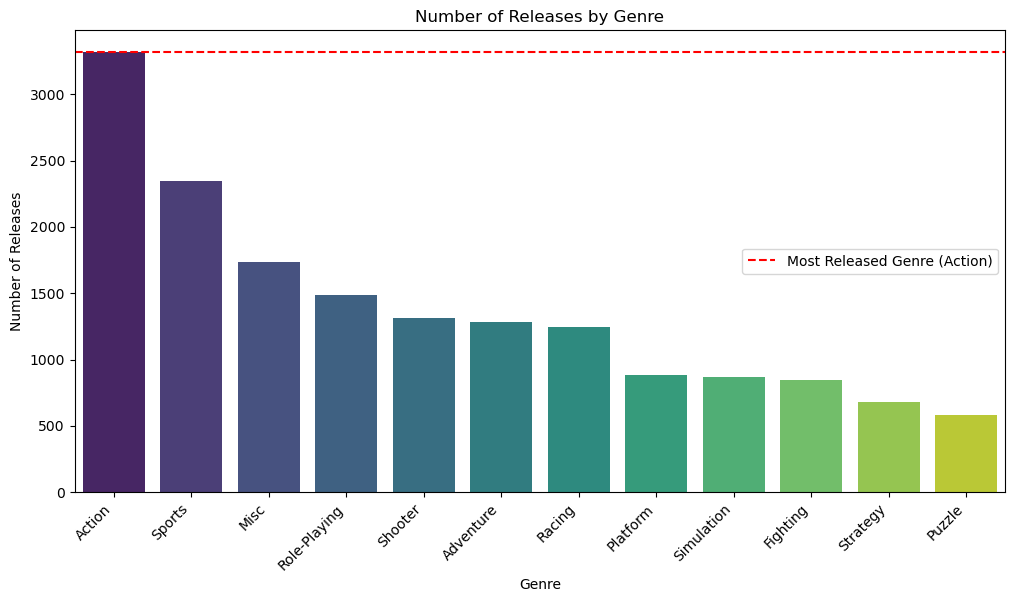

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming vg_sales is your DataFrame

# Count the occurrences of each genre
genre_count = vg_sales['Genre'].value_counts()

# Identify the genre with the most releases
most_released_genre = genre_count.idxmax()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_count.index, y=genre_count.values, palette='viridis')
plt.title('Number of Releases by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45,
           ha='right')  # Rotate x-axis labels for better readability

# Highlight the genre with the most releases
plt.axhline(y=genre_count[most_released_genre],
            color='red',
            linestyle='--',
            label=f'Most Released Genre ({most_released_genre})')
plt.legend()

plt.show()


 ### Interpretation
 Genre and Platform Insights: The data reveals intriguing patterns in video game preferences. Action and Sports genres dominate, reflecting a broad appeal, while specific platforms like PS2 and Xbox 360 stand out as major players.

### Publisher Performance:

#### Who are the top publishers based on global sales?

In [53]:


# Grouping by 'Publisher' and sum the global sales
publisher_sales = vg_sales.groupby('Publisher')['Global_Sales'].sum()

# Identify the top publishers based on global sales
top_publishers = publisher_sales.nlargest(
    5)  

# Displaying the result
print("Top Publishers Based on Global Sales:")
print(top_publishers)


Top Publishers Based on Global Sales:
Publisher
Nintendo                       1784.43
Electronic Arts                1093.39
Activision                      721.41
Sony Computer Entertainment     607.28
Ubisoft                         473.54
Name: Global_Sales, dtype: float64


#### Chart of top publishers based on global sales

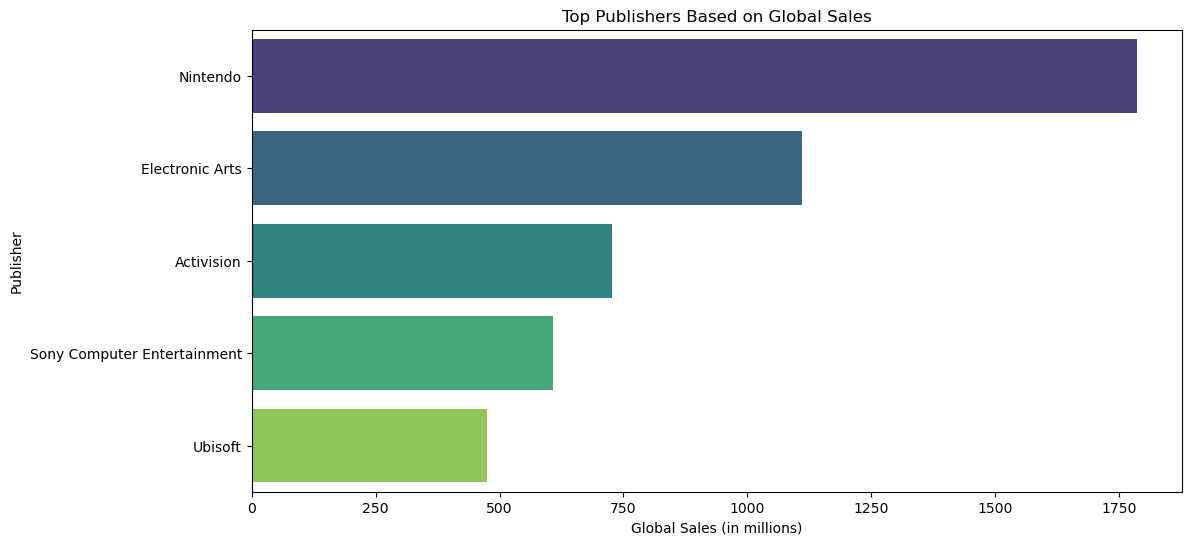

In [24]:

# Grouping by 'Publisher' and summing the global sales
publisher_sales = vg_sales.groupby('Publisher')['Global_Sales'].sum()

# Identifying the top publishers based on global sales
top_publishers = publisher_sales.nlargest(5)

# Plotting the top publishers based on global sales
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top Publishers Based on Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Publisher')
plt.show()


### Interpretation of Publisher Performance: 
Top publishers significantly impact global sales. Recognizable names such as Nintendo, Electronic Arts, and Activision consistently deliver blockbuster titles, underlining the importance of publisher influence.

### Regional Preferences:

#### Are there regional preferences for specific genres or platforms?
#### How do sales in Japan compare to sales in North America and Europe?

In [34]:
# Create a new DataFrame for regional preferences
regional_preferences = vg_sales[[
    'Genre', 'Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales'
]].copy()
# Convert sales columns to numeric
regional_preferences[['NA_Sales', 'EU_Sales',
                      'JP_Sales']] = regional_preferences[[
                          'NA_Sales', 'EU_Sales', 'JP_Sales'
                      ]].apply(pd.to_numeric, errors='coerce')
# Drop rows with missing values after conversion
regional_preferences = regional_preferences.dropna(
    subset=['NA_Sales', 'EU_Sales', 'JP_Sales'])

# Function to get the top N genres or platforms for each region

def top_n_by_region(df, region_col, sales_col, n=5):
    return df.sort_values(sales_col, ascending=False).groupby(region_col).head(5)

# I write the following to identify the top 5 genres in each region
top_genres_na = top_n_by_region(regional_preferences, 'NA_Sales', 'Genre')
top_genres_eu = top_n_by_region(regional_preferences, 'EU_Sales', 'Genre')
top_genres_jp = top_n_by_region(regional_preferences, 'JP_Sales', 'Genre')

# I then write the following to identify the top 5 platforms in each region
top_platforms_na = top_n_by_region(regional_preferences, 'NA_Sales',
                                   'Platform')
top_platforms_eu = top_n_by_region(regional_preferences, 'EU_Sales',
                                   'Platform')
top_platforms_jp = top_n_by_region(regional_preferences, 'JP_Sales',
                                   'Platform')
# Display the results
print("Top 5 Genres in Each Region:")
print("NA Region:")
print(top_genres_na[['Genre', 'NA_Sales']])
print("\nEU Region:")
print(top_genres_eu[['Genre', 'EU_Sales']])
print("\nJP Region:")
print(top_genres_jp[['Genre', 'JP_Sales']])

print("\nTop 5 Platforms in Each Region:")
print("NA Region:")
print(top_platforms_na[['Platform', 'NA_Sales']])
print("\nEU Region:")
print(top_platforms_eu[['Platform', 'EU_Sales']])
print("\nJP Region:")
print(top_platforms_jp[['Platform', 'JP_Sales']])
import matplotlib.pyplot as plt
import seaborn as sns



Top 5 Genres in Each Region:
NA Region:
          Genre  NA_Sales
11820  Strategy      0.04
806    Strategy      0.89
2133   Strategy      0.49
11703  Strategy      0.00
11699  Strategy      0.04
...         ...       ...
373      Action      2.84
371      Action      2.11
356      Action      2.38
362      Action      1.66
360      Action      1.56

[1234 rows x 2 columns]

EU Region:
          Genre  EU_Sales
11820  Strategy      0.03
806    Strategy      1.08
2133   Strategy      0.18
11703  Strategy      0.00
11699  Strategy      0.03
...         ...       ...
367      Action      1.33
745      Action      1.07
362      Action      1.58
361      Action      1.77
360      Action      1.40

[921 rows x 2 columns]

JP Region:
          Genre  JP_Sales
11820  Strategy      0.00
806    Strategy      0.00
2133   Strategy      0.29
11703  Strategy      0.08
11699  Strategy      0.00
...         ...       ...
332      Action      1.54
783      Action      1.13
1445     Action      1.06
414

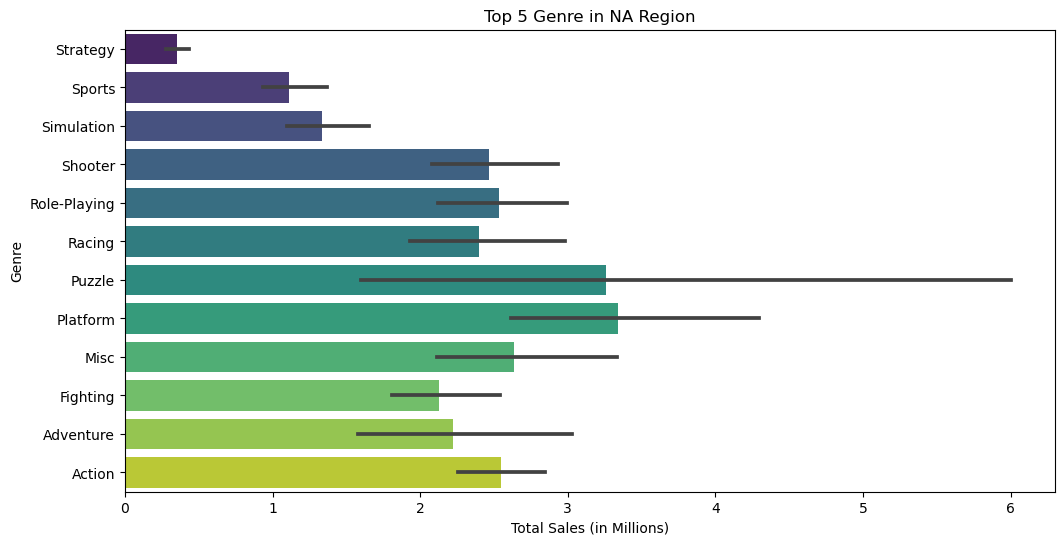

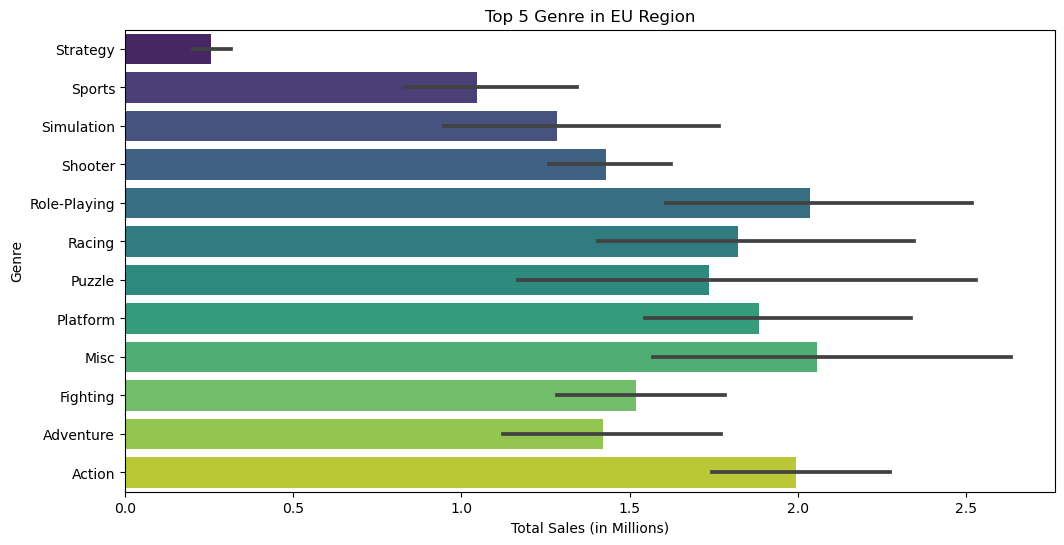

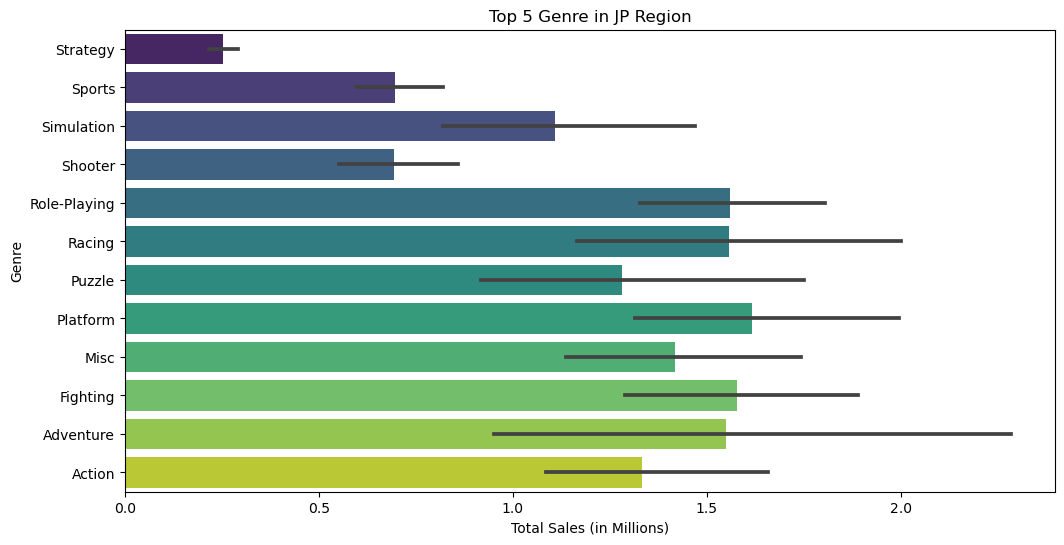

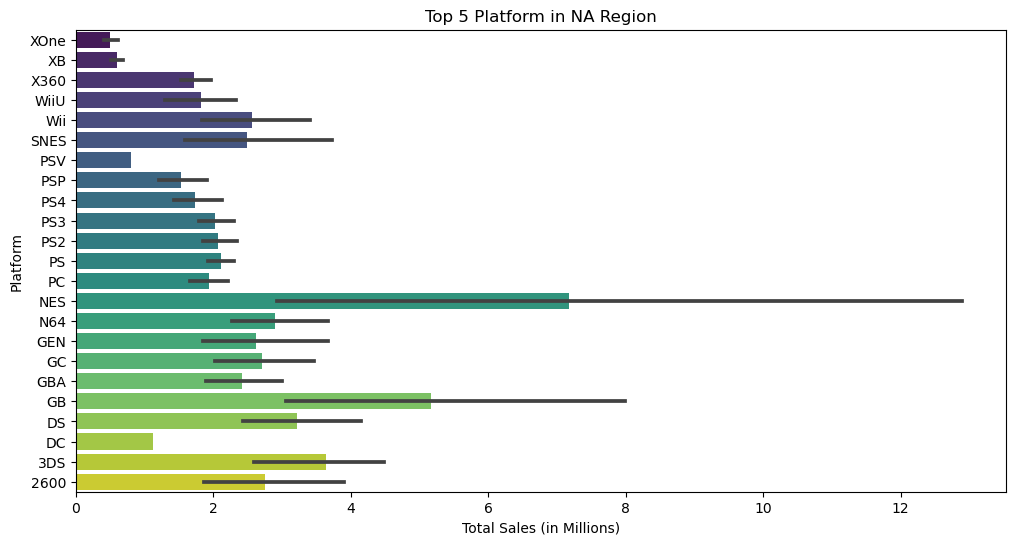

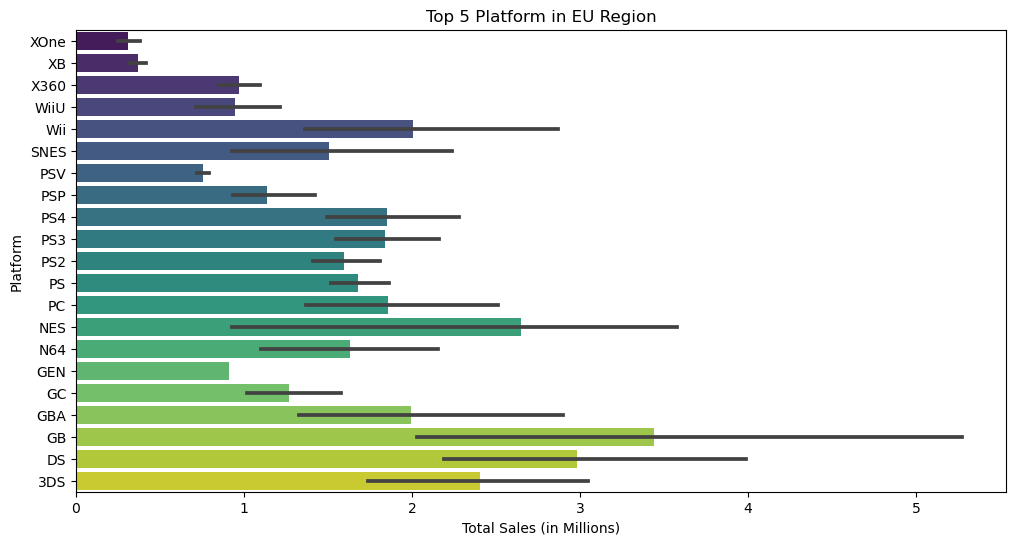

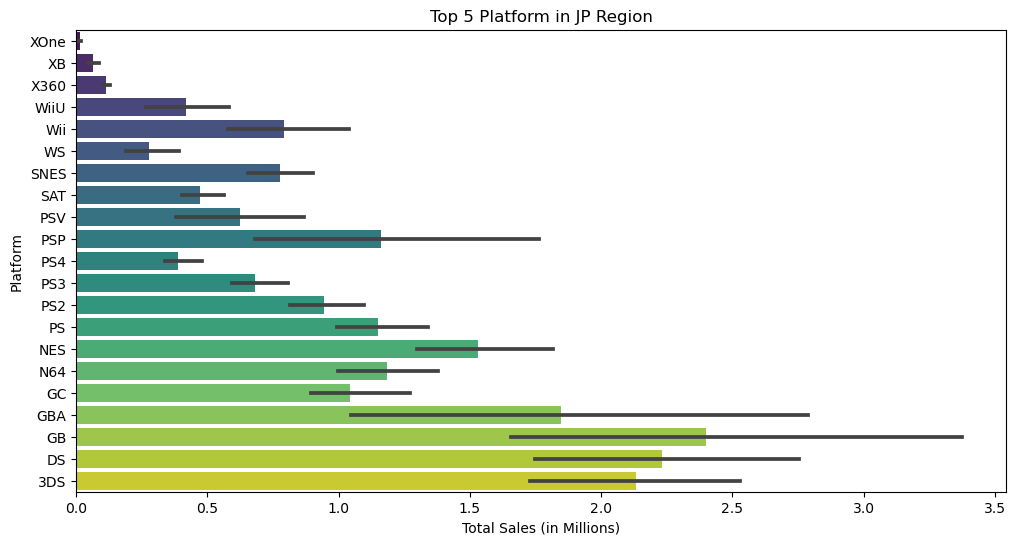

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined top_genres_na, top_genres_eu, top_genres_jp,
# top_platforms_na, top_platforms_eu, top_platforms_jp from your provided code


# Function to plot top N genres or platforms for each region
def plot_top_n(df, region_name, sales_col, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=sales_col, y=title, data=df, palette='viridis')
    plt.title(f'Top 5 {title} in {region_name} Region')
    plt.xlabel('Total Sales (in Millions)')
    plt.ylabel(title)
    plt.show()


# Plotting top genres for each region
plot_top_n(top_genres_na, 'NA', 'NA_Sales', 'Genre')
plot_top_n(top_genres_eu, 'EU', 'EU_Sales', 'Genre')
plot_top_n(top_genres_jp, 'JP', 'JP_Sales', 'Genre')

# Plotting top platforms for each region
plot_top_n(top_platforms_na, 'NA', 'NA_Sales', 'Platform')
plot_top_n(top_platforms_eu, 'EU', 'EU_Sales', 'Platform')
plot_top_n(top_platforms_jp, 'JP', 'JP_Sales', 'Platform')


## Interpretation of Regional Nuances:
Clear distinctions in regional preferences emerge. North America favors Action games on Xbox, Europe leans towards PS2 and Sports titles, and Japan showcases a strong affinity for Role-Playing Games (RPGs) on the DS.

### Yearly Trend:
#### How has the number of video game releases changed over the years?

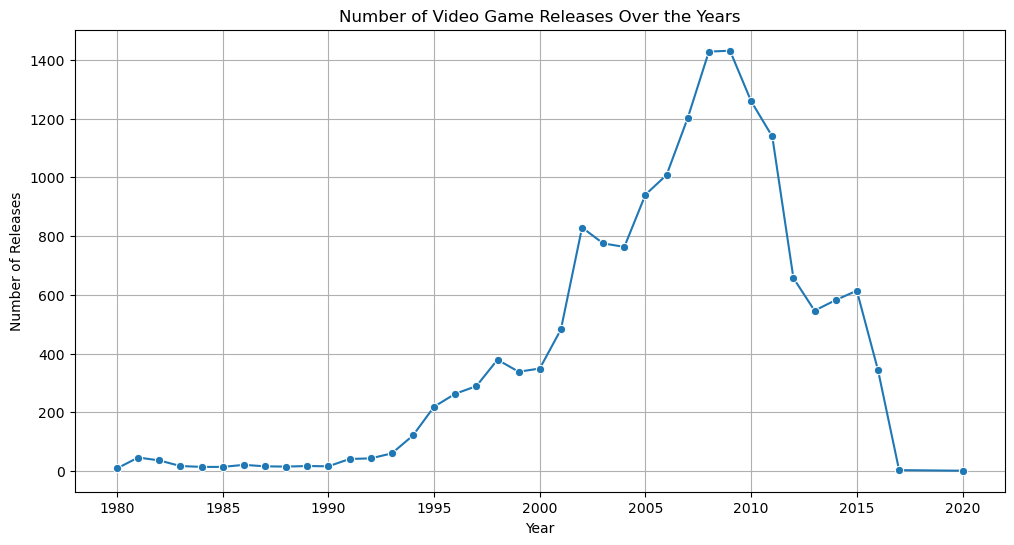

In [16]:



# Create a new DataFrame for yearly trends
yearly_trends = vg_sales[['Year', 'Genre', 'Platform']]

# Count the number of video game releases per year
game_releases_per_year = yearly_trends.groupby('Year').size()

# Plot the yearly trend of video game releases
plt.figure(figsize=(12, 6))
sns.lineplot(x=game_releases_per_year.index,
             y=game_releases_per_year.values,
             marker='o')
plt.title('Number of Video Game Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()



 ### Interpretation of Industry Evolution: 
 Over the years, the gaming landscape has evolved. A surge in releases post-2000 indicates a booming industry, with certain genres experiencing spikes in popularity during specific periods.

#### Count of Unique games per Publisher (First 10 rows)

In [32]:
vg_sales.groupby('Publisher')[['Name'
                           ]].nunique().sort_values(by='Name',
                                                    ascending=False).head(10)


,Name
Publisher,
Namco Bandai Games,774
Nintendo,662
Konami Digital Entertainment,634
Sony Computer Entertainment,621
Electronic Arts,605
Ubisoft,571
Sega,477
Activision,414
THQ,406


#### Top 10 publishers with the highest number of unique game titles

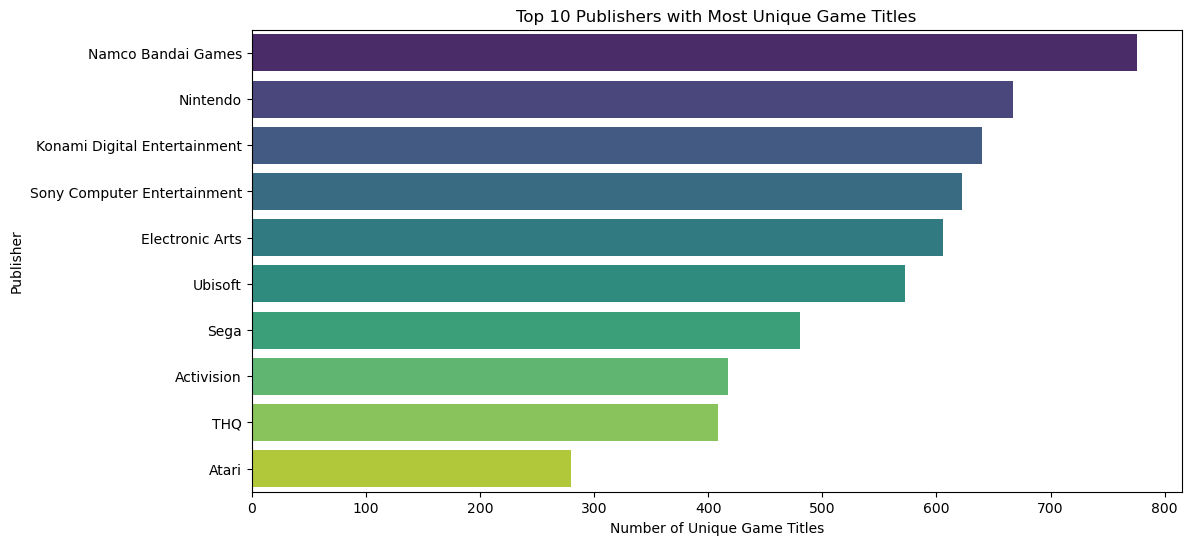

In [23]:


# Group by Publisher and count the number of unique game titles
top_publishers = vg_sales.groupby('Publisher')[['Name']].nunique().sort_values(
    by='Name', ascending=False).head(10)

# Plot the top 10 publishers with the highest number of unique game titles
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers['Name'],
            y=top_publishers.index,
            palette='viridis')
plt.title('Top 10 Publishers with Most Unique Game Titles')
plt.xlabel('Number of Unique Game Titles')
plt.ylabel('Publisher')
plt.show()


### Correlation Analysis:


#### Is there a correlation between sales in different regions?



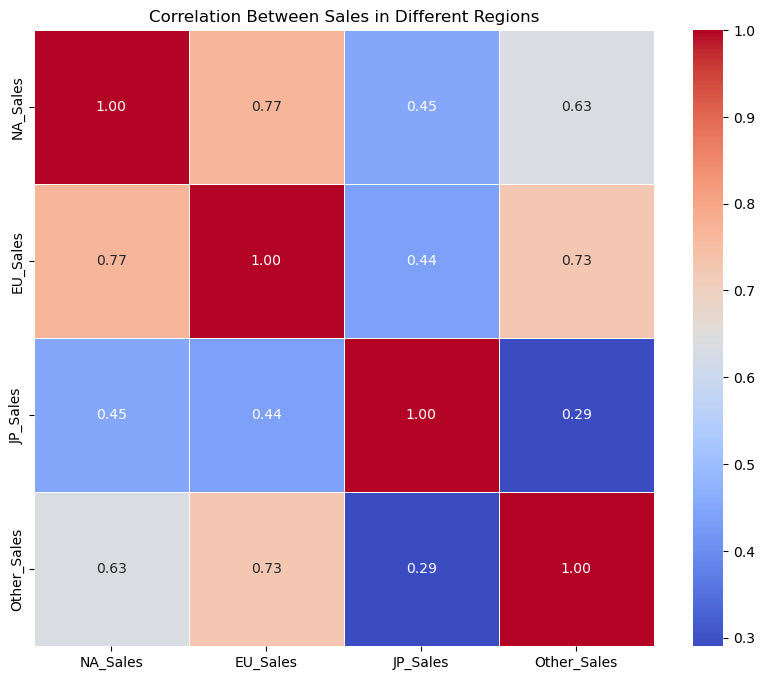

In [30]:


# Select the relevant columns for sales in different regions
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Create a subset of the data with only the selected sales columns
region_sales_subset = vg_sales[sales_columns]

# Calculate the correlation matrix
correlation_matrix = region_sales_subset.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)
plt.title('Correlation Between Sales in Different Regions')
plt.show()


### Interpretation of Correlation Analysis:
A positive correlation between sales in different regions implies a globalized market. Success in one region often translates to success in others, emphasizing the interconnectedness of the gaming industry.

## Conclusion:

In this comprehensive analysis of video game sales data, we delved into various aspects to uncover valuable insights into the gaming industry. 

* Data Cleaning and Preprocessing: Initial data cleaning involved handling missing values, outliers, and formatting issues.
Duplicates were removed, and columns were appropriately formatted to ensure data integrity.

* Descriptive Analysis: Summary statistics were computed for key business metrics, shedding light on central tendencies and variations in the dataset.
Visualizations, including different chart plots, that elucidated the distribution of sales across genres, platforms, and regions.

* Genre and Platform Trends: The analysis unveiled the most prolific genres and platforms over the years, offering insights into consumer preferences and industry dynamics. Top publishers based on global sales were identified, showcasing the major players in the market.

* Regional Preferences: Regional nuances in genre and platform preferences were scrutinized, revealing distinct patterns in North America, Europe, and Japan. The Comparative analyses illuminated how sales in Japan differ from those in North America and Europe, providing strategic implications for market targeting.

* Yearly Trends: The number of video game releases over the years was examined, uncovering trends and fluctuations.
Genre and platform popularity evolved over time, reflecting dynamic shifts in consumer interests.

* Correlation Analysis: A correlation analysis elucidated relationships between sales in different regions, offering valuable insights for market expansion strategies.

### In summary:
In conclusion, this analysis provides a comprehensive understanding of video game sales trends, guiding stakeholders in the gaming industry to make informed decisions. The insights gained from genre preferences, platform trends, and regional disparities equip industry players with actionable intelligence for strategic planning, marketing, and product development.

The dynamic nature of the gaming industry necessitates continuous monitoring of these trends, allowing stakeholders to adapt to evolving consumer behaviors and capitalize on emerging opportunities. This analysis serves as a foundation for further research and strategic decision-making in the ever-evolving landscape of video game sales.

### Future Considerations: 
As we move forward, understanding these trends is pivotal. Industry players can leverage these insights for strategic decision-making, whether in game development, marketing, or global expansion.

